In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 전체 데이터셋 : 5,000개
N = 5000

x1 = np.array(np.random.randn(N)).reshape(-1, 1)
x2 = np.array(np.random.randn(N)).reshape(-1, 1)
x3 = np.array(np.random.randn(N)).reshape(-1, 1)
x = np.concatenate((x1, x2, x3), axis=-1)

noise = 0.5 * np.random.randn(N).reshape(-1, 1)

# y = 5*x1 + 10*x2 + 3*x3 + 6.5 + noise
y = (5.0 * x1) + (10.0 * x2) + (3.0 * x3) + 6.5 + noise

print(x.shape, y.shape, noise.shape)

(5000, 3) (5000, 1) (5000, 1)


In [2]:
# train셋 : 4,000개, test셋 : 1,000개
x_train = x[:4000]
y_train = y[:4000].reshape(-1,)

x_test = x[4000:]
y_test = y[4000:].reshape(-1,)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(4000, 3) (4000,) (1000, 3) (1000,)


In [3]:
def hypothesis(x, w, b):
 h = x.dot(w) + b
 return h

def MSE(y_pred, y_true):
 err = (y_pred - y_true) ** 2
 return np.mean(err)

In [4]:
# 처음 초기값 (난수 발생)
w = np.random.rand(3)
b = np.random.rand()

print(w, b)

[0.66335463 0.90736316 0.26493943] 0.04767862883529417


In [5]:
epoch = 2000
alpha = 1e-2

total_loss = []
for i in range(epoch):
    h = hypothesis(x_train, w, b)
    loss = MSE(h, y_train)

    for j in range(3):
        grad = np.mean((h - y_train) * x_train[:, j])
        w[j] = w[j] - alpha * grad
        
    # Bias에는 미분한 값이 들어가지 않음
    grad = np.mean(h - y_train)
    b = b - alpha * grad
    
    total_loss.append(loss)

total_loss = np.array(total_loss)

In [6]:
print(w, b)

[5.0158617  9.98798285 3.00506833] 6.5109749494409765


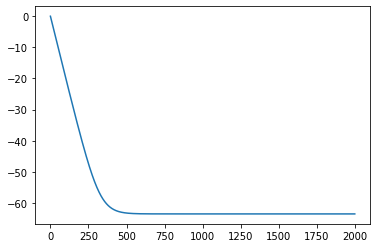

In [7]:
plt.plot(10.0 * np.log(total_loss / np.max(total_loss + 1e-5)))
plt.show()

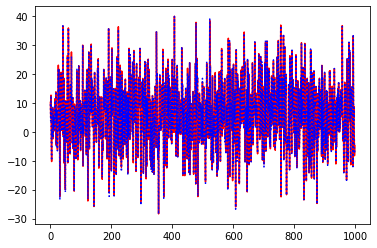

In [8]:
y_pred = hypothesis(x_test, w, b)

plt.plot(y_test, 'r', linestyle='solid') # true값
plt.plot(y_pred, 'b', linestyle='dotted') # 예측값

plt.show()